# Questrade Portfolio Manager

In [1]:
import os
import math
import requests
import numpy as np
import pandas as pd
import datetime as dt
import src.credentials as cred
import matplotlib.pyplot as plt
from src.questrade import QuestradeBot

## Personal Inputs and QuestradeBot Initialization

In [2]:
# ACCOUNT_NUM = cred.QUESTRADE_ACCOUNT_NUM
QUESTRADE_TOKEN = cred.QUESTRADE_API_CODE

qbot = QuestradeBot(QUESTRADE_TOKEN, ACCOUNT_NUM)

## Account Balance

In [3]:
balance = qbot.get_balance()
balance

,Cash,Market_Value,Total_Equity,Cash (%),Investment (%)
Currency,,,,,
CAD,0,0,0,0.0,0.0
USD,10000,0,10000,100.0,0.0


## Portfolio Holdings

In [4]:
portfolio = qbot.get_investment_summary()
portfolio

,Description,Currency,Quantities,Market Value,Return (%),Portfolio (%)


C:\Users\eshin\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


<AxesSubplot:title={'center':'Portfolio Breakdown'}, ylabel='Portfolio (%)'>

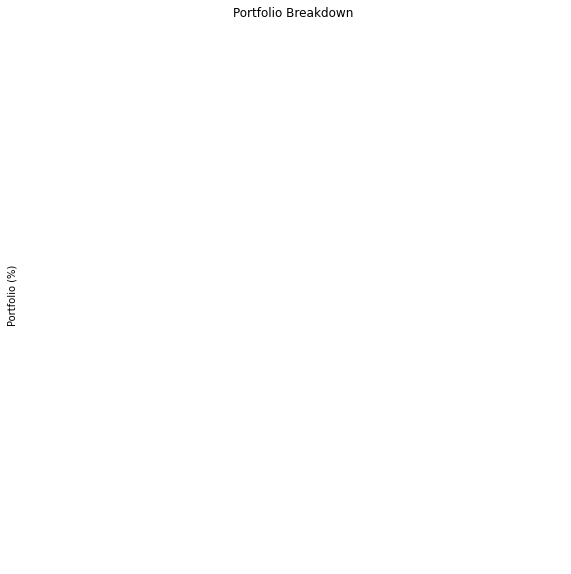

In [5]:
portfolio['Portfolio (%)'].plot(kind='pie',
                             title='Portfolio Breakdown',
                             figsize=(10, 10),
                             legend=True)

## Portfolio Return

In [6]:
portfolio_return = (portfolio['Return (%)'].dot(portfolio['Portfolio (%)'])) / 100
portfolio_return

0.0

## Monthly Dividend Income

In [7]:
div = qbot.get_dividend_income()
div.loc['Total'] = div.sum(numeric_only=True, axis=0)

<AxesSubplot:title={'center':'Monthly Dividend Payments'}, xlabel='Months', ylabel='Dividend ($)'>

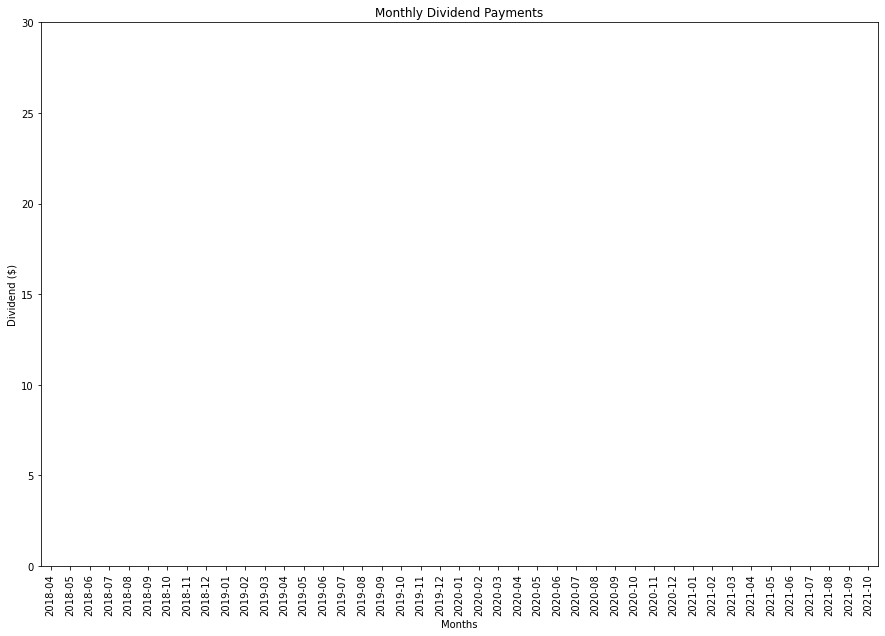

In [8]:
div[:-1].plot(kind='bar',
                    title='Monthly Dividend Payments',
                    xlabel='Months',
                    ylabel='Dividend ($)',
                    figsize=(15, 10),
                    legend=False,
                    ylim=(0, 30))

## Performance Against Benchmark